In [1]:
import pandas as pd
import database.fetch as fetch
import common.misc as misc
import matplotlib.pyplot as plt

# Top 10 Tweeters

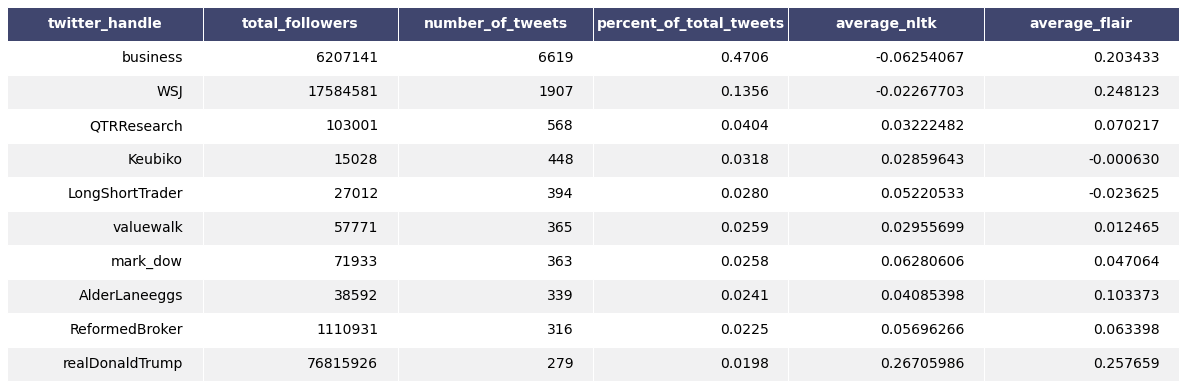

In [2]:
df = fetch.custom_query(table="tweets",
                   query="select u.twitter_handle,"
                   " u.total_followers,"
                   " count(t.user_id) as number_of_tweets,"
                   " count(t.user_id)/14066 as percent_of_total_tweets,"
                   " avg(t.nltk) as average_nltk,"
                   " avg(t.flair) as average_flair"
                   " from tweets t, users u"
                   " where"
                   " t.user_id = u.user_id"
                   " group by u.twitter_handle"
                   " order by count(t.user_id) desc;")
df = df.iloc[:10]
fig, ax = misc.render_mpl_table(df, header_columns=0, col_width=3.5)
fig.savefig("writeup\\top_tweeters.png")

# Number of tweets over time

In [17]:
def plot_tweet_count(tweet_df, title, group):
    #import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import common.dates as dates
    # adapted from matplotlib tutorial

    tweet_df =  dates.group_data(tweet_df, ['is_quoted'], method='count', group=group)

    tweet_df = tweet_df.drop(columns=['datetime'], inplace=False)#set_index('datetime', drop=False)
    #tweet_df = tweet_df[tweet_df['datetime'].notnull()]

    fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
    
    
    #date = tweet_df['datetime'].astype('O')
    #N = len(tweet_df)
    #ind = np.arange(N)  # the evenly spaced plot indices
    ax.bar(tweet_df.index, tweet_df['is_quoted'])
    #ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.set_title(title + " (Group=" + group[:-1]+"minutes)"+" (npoints= " + str(len(tweet_df)) + ")")
    ax.set_xlabel("Date")
    ax.set_ylabel("Tweet Count")
    #fig.autofmt_xdate()
    
    #ax.set_title("SPX Close Price from 2020-03-02 to 2020-04-07")

    plt.show()

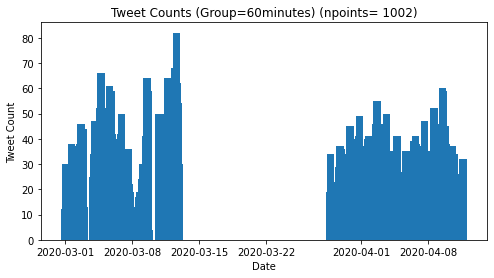

In [18]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets()
title = "Tweet Counts"
plot_tweet_count(tweet_df, title, "60T")

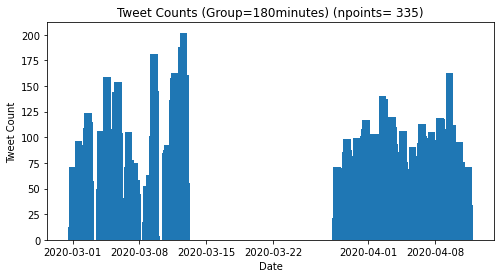

In [19]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets()
title = "Tweet Counts"
plot_tweet_count(tweet_df, title, "180T")

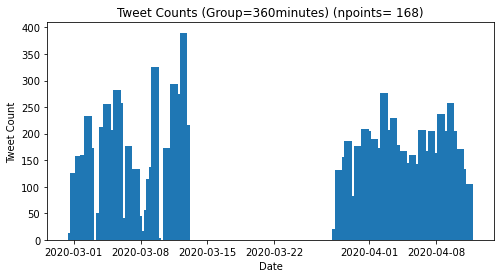

In [20]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets()
title = "Tweet Counts"
plot_tweet_count(tweet_df, title, "360T")

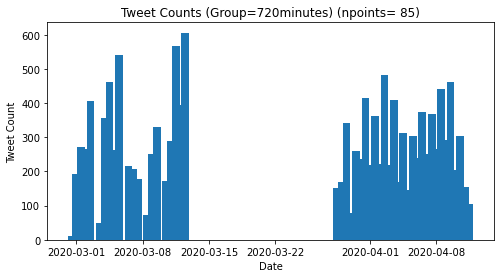

In [21]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets()
title = "Tweet Counts"
plot_tweet_count(tweet_df, title, "720T")

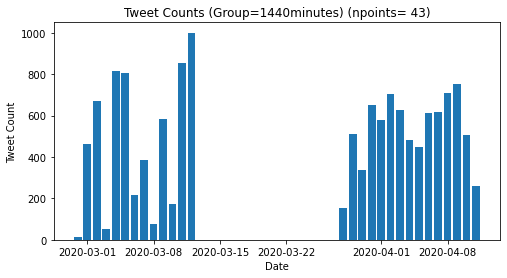

In [22]:
import database.fetch as fetch
tweet_df = fetch.fetch_tweets()
title = "Tweet Counts"
plot_tweet_count(tweet_df, title, "1440T")

# Sentiment 140

1600000


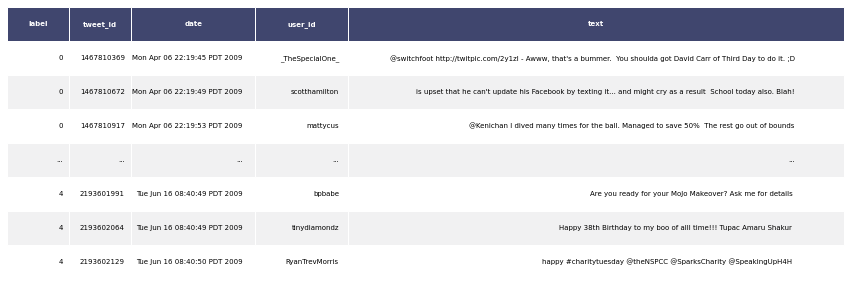

In [44]:
import pandas as pd
import common.misc as misc
df = pd.read_csv("data\\sentiment140.csv",
                 #index_col=1,
                 usecols=[0,1,2,4,5],
                 names=['label', 'tweet_id', 'date', 'user_id', 'text'])
df_fake = df.copy(deep=True)
df_fake.iloc[3] = ["...", "...", "...", "...", "..."]
#df_fake.iloc[3] = df_fake.rename(index={3:"..."})
df_fake = df_fake.iloc[3]
df = df.iloc[:3].append(df_fake).append(df.iloc[-3:])
#df = df.drop(columns='date')
fig, ax = misc.render_mpl_table(df, header_columns=0, font_size=7, cell_width_custom=[.1,.1,.2,.15,.8])
fig.savefig("writeup\\sentiment140.png")

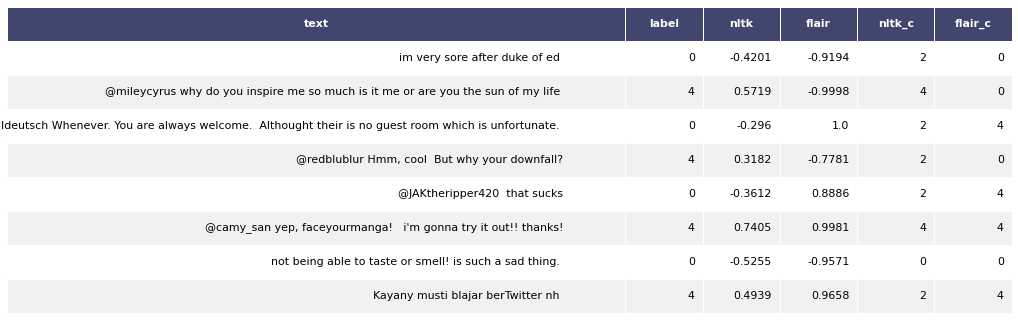

In [59]:
import pandas as pd
import common.misc as misc
df = pd.read_csv("data\\validateSentimentSmall.csv", index_col=0)
df = df.rename(columns={"sentiment":"label"})
df = df.iloc[2:]
df['nltk'] = [round(row['nltk'], 4) for index, row in df.iterrows()]
df['flair'] = [round(row['flair'], 4) for index, row in df.iterrows()]
cols = df.columns.tolist()
cols = [cols[1]] + [cols[0]] + cols[2:]
df = df[cols]
fig, ax = misc.render_mpl_table(df, header_columns=0, font_size=11, cell_width_custom=[.8,.1,.1,.1,.1, .1])
fig.savefig("writeup\\validateSentiment.png")

In [ ]:
df_fake